In [2]:
import sys
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
import matplotlib.pyplot as plt
import fileread as fr
import predefined as pd
import wave_ops as wo


In [3]:
data=fr.gen_output('/home/noah/Desktop/large_analysis/ca_analysis/cur_data/Run_118-all.dat')[0]
x=[]

bd,ch=4,3
psr=pd.single_pixel(data,bd,ch)
psr=psr[psr['energy']>2000]
temp=pd.single_pixel(pd.precuts(data),bd,ch)
temp=np.concatenate((temp,psr))
E=temp['energy']
temp['energy']=E*0.162+6.94

gauss = lambda t,a,mu,sigma: a*np.exp(-(t-mu)^2./(2.*sigma^2.))
prs=[0,0,0]



x.append(temp)

bd,ch=1,3
psr=pd.single_pixel(data,bd,ch)
psr=psr[psr['energy']>2000]
temp=pd.single_pixel(pd.precuts(data),bd,ch)
temp=np.concatenate((temp,psr))
E=temp['energy']
temp['energy']=E*0.162+6.94
x.append(temp)

del E,psr

529.0
523.4


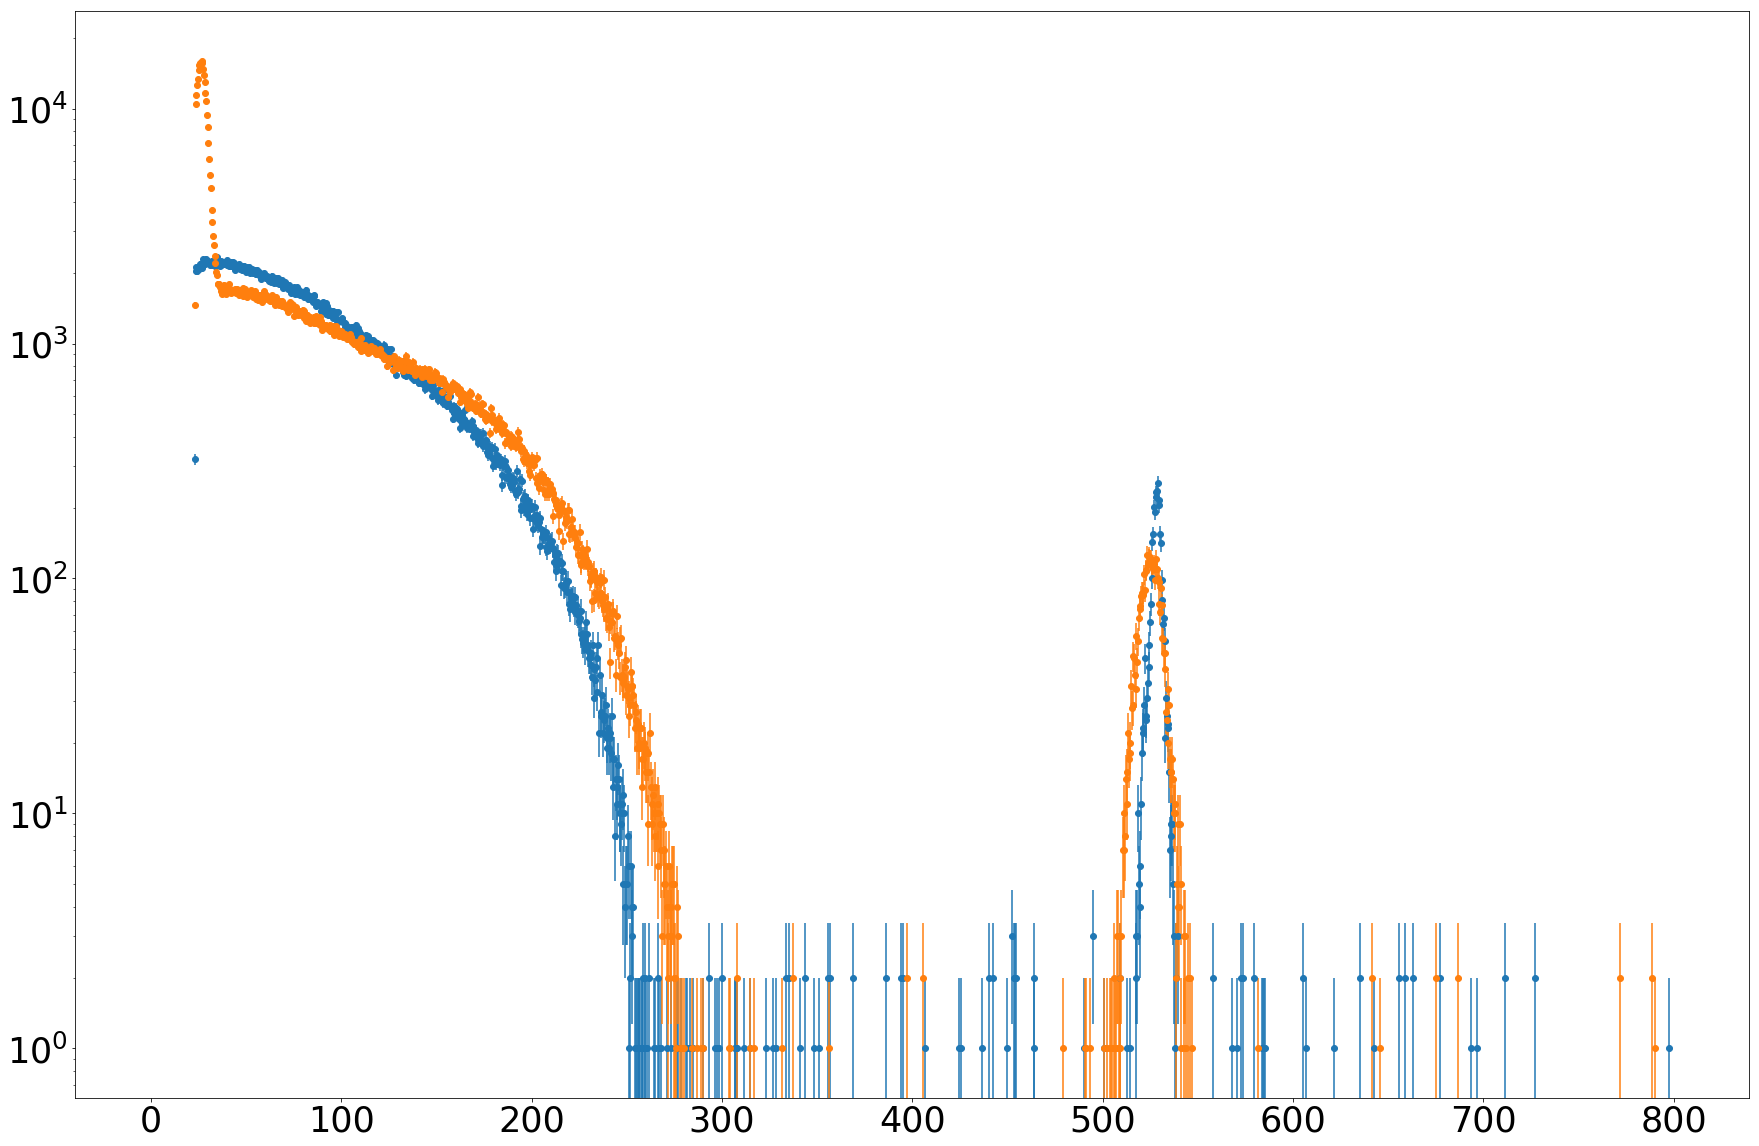

In [4]:
fs=35
plt.figure(figsize=(30,20))
for i in range(len(x)):
    hist,bins=np.histogram(x[i]['energy'],bins=2000,range=[0,800])
    bins=pd.cbins(bins)
    plt.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=pd.pixel(x[0][0]['board'],x[0][0]['channel']))
    print bins[np.argmax(hist[bins>300])+len(bins[bins<300])]
plt.yscale('log')
plt.tick_params(labelsize=fs)
plt.show()